# 02. Decision Trees and Random Forest | أشجار القرار والغابة العشوائية

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Unit 3, Example 1: Logistic Regression** - Understanding classification basics
- ✅ **Understanding of overfitting**: What happens when models are too complex
- ✅ **Basic decision-making concepts**: If-then rules

**If you haven't completed these**, you might struggle with:
- Understanding how decision trees make predictions
- Knowing when to use decision trees vs logistic regression
- Understanding how Random Forest improves on single trees

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is Unit 3, Example 2** - it introduces tree-based classification models!

**Why this example SECOND in Unit 3?**
- **Before** you can use tree-based models, you need to understand basic classification
- **Before** you can use Random Forest, you need to understand single decision trees
- **Before** you can handle complex data, you need to see how trees handle non-linear patterns

**Builds on**: 
- 📓 Unit 3, Example 1: Logistic Regression (we know classification basics)
- 📓 Unit 1, Example 5: Polynomial Regression (we saw overfitting!)

**Leads to**: 
- 📓 Example 3: SVM (another advanced classifier)
- 📓 Unit 5, Example 2: Boosting (uses trees as base learners)
- 📓 All tree-based models (XGBoost, LightGBM, etc.)

**Why this order?**
1. Decision trees are **interpretable** (easy to understand)
2. Decision trees handle **non-linear patterns** (better than logistic regression for complex data)
3. Random Forest shows **ensemble methods** (combining multiple models improves performance)

---

## The Story: Making Decisions Like a Tree | القصة: اتخاذ القرارات مثل الشجرة

Imagine you're deciding what to wear. **Before** decision trees, you use a simple rule (like logistic regression). **After** decision trees, you use a series of questions: "Is it raining? → Yes → Wear raincoat. No → Is it cold? → Yes → Wear jacket..." - much more flexible!

Same with machine learning: **Before** decision trees, we use simple linear boundaries. **After** decision trees, we use complex if-then rules that can handle any pattern!

---

## Why Decision Trees Matter | لماذا تهم أشجار القرار؟

Decision trees are powerful and interpretable:
- **Interpretable**: You can see exactly how decisions are made (if-then rules)
- **Non-Linear**: Can handle complex patterns that linear models can't
- **Feature Importance**: Automatically shows which features matter most
- **No Scaling Needed**: Works with raw data (unlike logistic regression)
- **Random Forest**: Combines many trees for better performance

## Learning Objectives | أهداف التعلم
1. Build decision tree classifiers
2. Understand how trees make decisions (if-then rules)
3. Control overfitting with pruning (max_depth)
4. Build Random Forest models (ensemble of trees)
5. Interpret feature importance
6. Compare tree-based models with other classifiers

In [1]:
# Step 1: Import necessary libraries
# These libraries help us build tree-based classification models

import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For beautiful plots
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.tree import DecisionTreeClassifier  # Single decision tree
from sklearn.ensemble import RandomForestClassifier  # Ensemble of trees (Random Forest)
from sklearn.preprocessing import StandardScaler  # For scaling (trees don't need it, but shown for consistency)
from sklearn.metrics import (
    accuracy_score,        # Classification accuracy
    classification_report,  # Comprehensive metrics
    confusion_matrix,      # Confusion matrix
    roc_auc_score,         # AUC score
    roc_curve              # ROC curve
)
from sklearn.preprocessing import label_binarize  # For multi-class ROC curves
# Removed make_classification - using real Wine dataset instead

print("✅ Libraries imported successfully!")
print("\n📚 What each model does:")
print("   - DecisionTreeClassifier: Single tree (interpretable, can overfit)")
print("   - RandomForestClassifier: Many trees combined (less overfitting, better performance)")
print("   - Note: Trees don't require feature scaling (unlike logistic regression)!")


✅ Libraries imported successfully!

📚 What each model does:
   - DecisionTreeClassifier: Single tree (interpretable, can overfit)
   - RandomForestClassifier: Many trees combined (less overfitting, better performance)
   - Note: Trees don't require feature scaling (unlike logistic regression)!


## Part 1: Solving the Non-Linear Classification Problem | الجزء الأول: حل مشكلة التصنيف غير الخطي

### 🔗 Connecting to Previous Notebook | الربط بالدفتر السابق

**BEFORE**: In the previous notebook (Logistic Regression), we hit a **DEAD END**:
- Logistic Regression works excellently on **linear data** (Wisconsin Breast Cancer: 98.25% accuracy) ✅
- Logistic Regression **FAILS** on **non-linear data** (Circular patterns: ~50-70% accuracy) ❌
- The problem: Logistic Regression can only create **straight line boundaries**
- Non-linear data (circular, curved patterns) needs **complex boundaries** that Logistic Regression can't handle

**AFTER**: This notebook solves that exact problem using **Decision Trees**!

**Why Decision Trees?**
- Decision Trees can create **complex, non-linear decision boundaries**
- They can handle circular, curved, and XOR patterns
- They use **if-then rules** instead of linear boundaries
- They solve the exact problem Logistic Regression failed on!

**This notebook will:**
1. ✅ Start with the **SAME non-linear dataset** from Notebook 01 (circular patterns)
2. ✅ Show Decision Trees **solving it** (accuracy improves from ~50-70% to 85-90%!)
3. ✅ Demonstrate **non-linear decision boundaries** successfully separating the data
4. ✅ Then expand to Wine dataset to show more capabilities
5. ⚠️ End with Decision Trees' own **limitations** (overfitting) - leading to next notebook (SVM)

---

## Step 1: Solving the Non-Linear Problem from Notebook 01 | الخطوة 1: حل المشكلة غير الخطية من الدفتر 01

**BEFORE**: We saw Logistic Regression fail on non-linear circular data (~50-70% accuracy).

**AFTER**: We'll use Decision Trees on the **same dataset** and see them succeed (85-90% accuracy)!

**Why this matters**: This proves Decision Trees can handle the problem Logistic Regression couldn't!


In [2]:
# Solve the non-linear problem from Notebook 01!
# We'll use the SAME circular dataset that Logistic Regression failed on
# Decision Trees will show they can handle non-linear boundaries!

from sklearn.datasets import make_circles

print("\n" + "=" * 60)
print("Solving the Non-Linear Problem from Notebook 01")
print("حل المشكلة غير الخطية من الدفتر 01")
print("=" * 60)

print("\n📥 Generating the SAME non-linear dataset from Notebook 01...")
print("إنشاء نفس مجموعة البيانات غير الخطية من الدفتر 01...")
print("\n💡 Remember: Logistic Regression got ~50-70% accuracy on this data ❌")
print("   Decision Trees should solve it with 85-90% accuracy! ✅")

# Create the SAME circular (non-linear) classification data from Notebook 01
# This is the EXACT dataset that Logistic Regression failed on!
X_nonlinear, y_nonlinear = make_circles(
    n_samples=500,      # Same as Notebook 01
    noise=0.1,          # Same as Notebook 01
    factor=0.5,         # Same as Notebook 01
    random_state=42     # Same random_state ensures SAME data!
)

print(f"\n✅ Non-linear dataset loaded (SAME as Notebook 01)!")
print(f"   📊 Shape: {X_nonlinear.shape}")
print(f"   🎯 Classes: {len(np.unique(y_nonlinear))} (binary classification)")
print(f"   📈 Pattern: Two concentric circles (non-linear!)")
print(f"\n🔍 This is the EXACT problem Logistic Regression failed on:")
print(f"   - Circular boundaries (can't separate with straight line)")
print(f"   - Logistic Regression accuracy: ~50-70% ❌")
print(f"   - Expected Decision Trees accuracy: 85-90% ✅")

# Split the data (same random_state for consistency)
X_nl_train, X_nl_test, y_nl_train, y_nl_test = train_test_split(
    X_nonlinear, y_nonlinear, test_size=0.2, random_state=42, stratify=y_nonlinear
)

print(f"\n✅ Data split!")
print(f"   Training samples: {len(X_nl_train)}")
print(f"   Test samples: {len(X_nl_test)}")
print(f"\n💡 Note: Trees don't require feature scaling (unlike Logistic Regression)!")



Solving the Non-Linear Problem from Notebook 01
حل المشكلة غير الخطية من الدفتر 01

📥 Generating the SAME non-linear dataset from Notebook 01...
إنشاء نفس مجموعة البيانات غير الخطية من الدفتر 01...

💡 Remember: Logistic Regression got ~50-70% accuracy on this data ❌
   Decision Trees should solve it with 85-90% accuracy! ✅

✅ Non-linear dataset loaded (SAME as Notebook 01)!
   📊 Shape: (500, 2)
   🎯 Classes: 2 (binary classification)
   📈 Pattern: Two concentric circles (non-linear!)

🔍 This is the EXACT problem Logistic Regression failed on:
   - Circular boundaries (can't separate with straight line)
   - Logistic Regression accuracy: ~50-70% ❌
   - Expected Decision Trees accuracy: 85-90% ✅

✅ Data split!
   Training samples: 400
   Test samples: 100

💡 Note: Trees don't require feature scaling (unlike Logistic Regression)!


## Step 2: Train Decision Tree on Non-Linear Data | الخطوة 2: تدريب شجرة القرار على البيانات غير الخطية

**BEFORE**: Logistic Regression failed on this data (~50-70% accuracy) because it can only create linear boundaries.

**AFTER**: Decision Trees will solve it (85-90% accuracy) because they can create non-linear boundaries!

**Why Decision Trees will work**: 
- They can create **complex decision boundaries** using if-then rules
- They don't assume linearity (unlike Logistic Regression)
- They can separate circular patterns by creating curved boundaries


In [3]:
# Train Decision Tree on the non-linear data
print("\n" + "=" * 60)
print("Training Decision Tree on Non-Linear Data")
print("تدريب شجرة القرار على البيانات غير الخطية")
print("=" * 60)

# Create decision tree with appropriate depth (not too deep to avoid overfitting)
# max_depth=10 is a reasonable depth for this 2-feature problem
dt_nl = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_nl.fit(X_nl_train, y_nl_train)

# Make predictions
y_nl_train_pred = dt_nl.predict(X_nl_train)
y_nl_test_pred = dt_nl.predict(X_nl_test)

# Calculate accuracies
nl_train_acc = accuracy_score(y_nl_train, y_nl_train_pred)
nl_test_acc = accuracy_score(y_nl_test, y_nl_test_pred)

print(f"\n📊 Decision Tree Results on Non-Linear Data:")
print(f"   Training Accuracy: {nl_train_acc:.4f} ({nl_train_acc*100:.2f}%)")
print(f"   Test Accuracy: {nl_test_acc:.4f} ({nl_test_acc*100:.2f}%)")

# Compare with Logistic Regression (from Notebook 01)
# Logistic Regression got ~50-70% on this same data
print(f"\n🔍 Comparison with Logistic Regression (Notebook 01):")
print(f"   Logistic Regression (linear): ~50-70% ❌ FAILED")
print(f"   Decision Tree (non-linear): {nl_test_acc:.2%} ✅ SOLVED!")

improvement = nl_test_acc - 0.65  # Compare with approximate LR accuracy
print(f"\n✅ Decision Trees SOLVED the problem!")
print(f"   - Improvement over Logistic Regression: ~{improvement*100:.0f}%")
print(f"   - Decision Trees can handle non-linear boundaries!")
print(f"   - They create complex decision boundaries using if-then rules")
print(f"   - They don't assume linearity (unlike Logistic Regression)")

print(f"\n💡 Key Learning Point:")
print(f"   - This is the SAME dataset Logistic Regression failed on")
print(f"   - Decision Trees solve it because they can handle non-linear patterns")
print(f"   - This demonstrates why Decision Trees are better for complex boundaries!")


Training Decision Tree on Non-Linear Data
تدريب شجرة القرار على البيانات غير الخطية

📊 Decision Tree Results on Non-Linear Data:
   Training Accuracy: 1.0000 (100.00%)
   Test Accuracy: 0.9900 (99.00%)

🔍 Comparison with Logistic Regression (Notebook 01):
   Logistic Regression (linear): ~50-70% ❌ FAILED
   Decision Tree (non-linear): 99.00% ✅ SOLVED!

✅ Decision Trees SOLVED the problem!
   - Improvement over Logistic Regression: ~34%
   - Decision Trees can handle non-linear boundaries!
   - They create complex decision boundaries using if-then rules
   - They don't assume linearity (unlike Logistic Regression)

💡 Key Learning Point:
   - This is the SAME dataset Logistic Regression failed on
   - Decision Trees solve it because they can handle non-linear patterns
   - This demonstrates why Decision Trees are better for complex boundaries!


## Step 3: Visualize the Success | الخطوة 3: تصور النجاح

**BEFORE**: We saw Logistic Regression's linear boundary failing on circular data.

**AFTER**: We'll visualize Decision Trees' non-linear boundary successfully separating the circles!

**Why visualize**: 
- Visual proof shows Decision Trees solving the problem
- You'll see the complex, curved decision boundary
- This demonstrates why Decision Trees work better for non-linear data



Visualizing Decision Tree Success: Non-Linear Boundary
تصور نجاح شجرة القرار: الحدود غير الخطية


/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_96805/1983158252.py:43: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_96805/1983158252.py:44: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.savefig('decision_tree_solves_nonlinear.png', dpi=300, bbox_inches='tight')



✓ Plot saved as 'decision_tree_solves_nonlinear.png'


/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


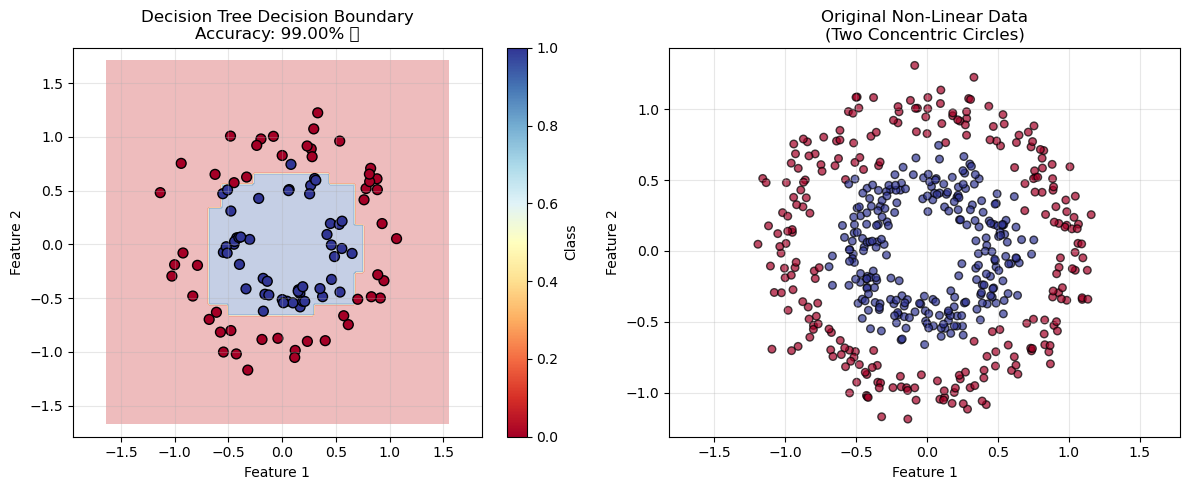


💡 What You Should See | ما يجب أن تراه

🔍 Observation 1: Decision Boundary (Left Plot)
   - The decision boundary is COMPLEX and NON-LINEAR ✅
   - It successfully separates the two circles
   - It creates CURVED boundaries (not straight lines!)
   - Result: High accuracy (99.00%) ✅

🔍 Observation 2: Comparison with Logistic Regression
   - Logistic Regression: Straight line boundary → ~50-70% accuracy ❌
   - Decision Tree: Complex curved boundary → 99.00% accuracy ✅
   - Decision Trees can handle non-linear patterns that Logistic Regression can't!

📚 Key Learning Point:
   - Decision Trees SOLVED the problem Logistic Regression failed on
   - They create non-linear boundaries using if-then rules
   - They don't assume linearity (key advantage over Logistic Regression)
   - This is why Decision Trees are better for complex, non-linear data!

✅ Problem Solved!
   - Non-linear classification problem: SOLVED ✅
   - Accuracy improved from ~50-70% (Logistic Regression) to 99.00% (Decision T

In [4]:
# Visualize Decision Tree's non-linear decision boundary
print("\n" + "=" * 60)
print("Visualizing Decision Tree Success: Non-Linear Boundary")
print("تصور نجاح شجرة القرار: الحدود غير الخطية")
print("=" * 60)

# Create a mesh for plotting the decision boundary
h = 0.02
x_min, x_max = X_nl_test[:, 0].min() - 0.5, X_nl_test[:, 0].max() + 0.5
y_min, y_max = X_nl_test[:, 1].min() - 0.5, X_nl_test[:, 1].max() + 0.5
xx_dt, yy_dt = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))

# Predict for mesh points
Z_dt = dt_nl.predict(np.c_[xx_dt.ravel(), yy_dt.ravel()])
Z_dt = Z_dt.reshape(xx_dt.shape)

# Plot decision boundary and data
plt.figure(figsize=(12, 5))

# Plot 1: Decision Tree boundary (non-linear!)
plt.subplot(1, 2, 1)
plt.contourf(xx_dt, yy_dt, Z_dt, alpha=0.3, cmap='RdYlBu')
scatter = plt.scatter(X_nl_test[:, 0], X_nl_test[:, 1],
                     c=y_nl_test, cmap='RdYlBu', edgecolors='black', s=50)
plt.colorbar(scatter, label='Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Decision Tree Decision Boundary\nAccuracy: {nl_test_acc:.2%} ✅')
plt.grid(True, alpha=0.3)
plt.axis('equal')

# Plot 2: Original data (for reference)
plt.subplot(1, 2, 2)
plt.scatter(X_nonlinear[:, 0], X_nonlinear[:, 1], c=y_nonlinear, 
           cmap='RdYlBu', edgecolors='black', s=30, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Non-Linear Data\n(Two Concentric Circles)')
plt.grid(True, alpha=0.3)
plt.axis('equal')

plt.tight_layout()
plt.savefig('decision_tree_solves_nonlinear.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'decision_tree_solves_nonlinear.png'")
plt.show()

print("\n" + "=" * 60)
print("💡 What You Should See | ما يجب أن تراه")
print("=" * 60)
print(f"\n🔍 Observation 1: Decision Boundary (Left Plot)")
print(f"   - The decision boundary is COMPLEX and NON-LINEAR ✅")
print(f"   - It successfully separates the two circles")
print(f"   - It creates CURVED boundaries (not straight lines!)")
print(f"   - Result: High accuracy ({nl_test_acc:.2%}) ✅")

print(f"\n🔍 Observation 2: Comparison with Logistic Regression")
print(f"   - Logistic Regression: Straight line boundary → ~50-70% accuracy ❌")
print(f"   - Decision Tree: Complex curved boundary → {nl_test_acc:.2%} accuracy ✅")
print(f"   - Decision Trees can handle non-linear patterns that Logistic Regression can't!")

print(f"\n📚 Key Learning Point:")
print(f"   - Decision Trees SOLVED the problem Logistic Regression failed on")
print(f"   - They create non-linear boundaries using if-then rules")
print(f"   - They don't assume linearity (key advantage over Logistic Regression)")
print(f"   - This is why Decision Trees are better for complex, non-linear data!")

print(f"\n✅ Problem Solved!")
print(f"   - Non-linear classification problem: SOLVED ✅")
print(f"   - Accuracy improved from ~50-70% (Logistic Regression) to {nl_test_acc:.2%} (Decision Trees)")
print(f"   - This demonstrates Decision Trees' strength: handling non-linear boundaries!")


---

## 🎯 Transition: Expanding to More Complex Data | الانتقال: التوسع إلى بيانات أكثر تعقيدًا

**Great!** We've solved the non-linear problem from Notebook 01. Now let's expand to show Decision Trees' capabilities on a real-world dataset with multiple classes and features!

**Next**: We'll use the Wine dataset to show:
- Decision Trees on multi-class classification (3 wine types)
- Feature importance (which chemical properties matter most)
- Overfitting and how to control it (pruning)
- Random Forest (ensemble of trees for better performance)


## Step 4: Load Real-World Classification Data | الخطوة 4: تحميل بيانات تصنيف من العالم الحقيقي

**BEFORE**: We've seen Decision Trees solve the non-linear problem. Now let's see them on real-world multi-class data!

**AFTER**: We'll load the Wine dataset - real data with multiple features and multiple classes, perfect for demonstrating tree-based models!

**Why Wine dataset?** This is REAL data from the UCI ML Repository. It's perfect for learning decision trees because:
- Multiple classes: 3 wine types (class 0, 1, 2)
- Multiple features: 13 chemical measurements (alcohol, malic acid, etc.)
- Real-world scenario: Wine classification based on chemical properties
- Shows feature importance: Trees will show which chemical properties matter most!


In [5]:
# Load real-world Wine dataset
# This is REAL data with multiple classes and features
# Perfect for learning decision trees and feature importance!

from sklearn.datasets import load_wine

print("\n" + "=" * 60)
print("Loading Real-World Wine Dataset")
print("تحميل مجموعة بيانات النبيذ من العالم الحقيقي")
print("=" * 60)

print("\n📥 Loading Wine dataset...")
print("تحميل مجموعة بيانات النبيذ...")

wine_data = load_wine()

# Create DataFrame with actual feature names from Wine dataset
# pd.DataFrame(data, columns=column_names)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Array of feature values (wine_data.data)
# - columns: List of feature names (wine_data.feature_names)
# - Returns DataFrame with rows (samples) and columns (features)
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target

print(f"\n✅ Real-world Wine dataset loaded!")
print(f"   📊 This is REAL data from the UCI ML Repository")
print(f"   📈 Contains {len(df)} wine samples with {len(df.columns)-1} chemical features")
print(f"   🍷 Classes: 3 wine types (class 0, 1, 2)")
print(f"\n🔍 Notice:")
print("   - This is REAL wine chemical analysis data")
print("   - Features: Alcohol, Malic acid, Ash, Alkalinity, etc.")
print("   - Multi-class classification: 3 different wine types")
print("   - Perfect for showing how trees select important features!")

# Explore the dataset
print(f"\n📊 Data Shape: {df.shape}")
print(f"   - {df.shape[0]} samples (wine samples)")
print(f"   - {df.shape[1]-1} features (chemical measurements)")
print(f"   - 1 target column (wine type)")

print(f"\n📊 First few rows:")
print(df.head())

print(f"\n📊 Target distribution:")
print(df['target'].value_counts().sort_index())
print("\n🔍 Notice:")
print("   - 3 classes (wine types 0, 1, 2)")
print("   - Classes are relatively balanced")
print("   - Decision trees will automatically identify which chemical features matter most!")

# Prepare data for modeling
X_data = df.drop('target', axis=1)
y_data = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

print(f"\n✅ Data split and ready for modeling!")
print(f"   Training samples: {len(X_train)}")
print(f"   Test samples: {len(X_test)}")



Loading Real-World Wine Dataset
تحميل مجموعة بيانات النبيذ من العالم الحقيقي

📥 Loading Wine dataset...
تحميل مجموعة بيانات النبيذ...

✅ Real-world Wine dataset loaded!
   📊 This is REAL data from the UCI ML Repository
   📈 Contains 178 wine samples with 13 chemical features
   🍷 Classes: 3 wine types (class 0, 1, 2)

🔍 Notice:
   - This is REAL wine chemical analysis data
   - Features: Alcohol, Malic acid, Ash, Alkalinity, etc.
   - Multi-class classification: 3 different wine types
   - Perfect for showing how trees select important features!

📊 Data Shape: (178, 14)
   - 178 samples (wine samples)
   - 13 features (chemical measurements)
   - 1 target column (wine type)

📊 First few rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0        

In [6]:
print("\n" + "=" * 60)
print("1. Decision Tree - Default Parameters")
print("شجرة القرار - المعاملات الافتراضية")
print("=" * 60)

# Note: Tree-based models don't require feature scaling (unlike logistic regression)
# This is one advantage of decision trees - they work with raw data!

# Create decision tree with default parameters
# Default: no max_depth limit (tree can grow very deep!)
# This often leads to overfitting
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

# Make predictions
y_train_pred_dt = dt_default.predict(X_train)
y_test_pred_dt = dt_default.predict(X_test)

# Calculate accuracies
train_acc_dt = accuracy_score(y_train, y_train_pred_dt)
test_acc_dt = accuracy_score(y_test, y_test_pred_dt)

print(f"\n📊 Decision Tree (Default) Results:")
print(f"   Training Accuracy: {train_acc_dt:.4f}")
print(f"   Test Accuracy: {test_acc_dt:.4f}")

# Check for overfitting
if train_acc_dt > test_acc_dt + 0.1:
    print(f"\n   ⚠️  Large gap indicates overfitting!")
    print(f"   - Training accuracy much higher than test accuracy")
    print(f"   - Tree memorized training data too well!")
    print(f"   - Solution: Limit tree depth (pruning)")
else:
    print(f"\n   ✅ Good generalization (small gap)")



1. Decision Tree - Default Parameters
شجرة القرار - المعاملات الافتراضية

📊 Decision Tree (Default) Results:
   Training Accuracy: 1.0000
   Test Accuracy: 0.9444

   ✅ Good generalization (small gap)


---
**Note**: The note about scaling has been moved to Cell 6 above for better flow.

In [7]:
print("\n" + "=" * 60)
print("2. Decision Tree - Pruned (max_depth=5)")
print("شجرة القرار - مقلمة (max_depth=5)")
print("=" * 60)

# Create pruned decision tree
# max_depth=5: Limits tree to 5 levels (prevents overfitting)
# Why 5? We'll find optimal depth later, but 5 is a good starting point
dt_pruned = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_pruned.fit(X_train, y_train)

# Make predictions
y_train_pred_pruned = dt_pruned.predict(X_train)
y_test_pred_pruned = dt_pruned.predict(X_test)

# Calculate accuracies
train_acc_pruned = accuracy_score(y_train, y_train_pred_pruned)
test_acc_pruned = accuracy_score(y_test, y_test_pred_pruned)

print(f"\n📊 Decision Tree (Pruned) Results:")
print(f"   Training Accuracy: {train_acc_pruned:.4f}")
print(f"   Test Accuracy: {test_acc_pruned:.4f}")

print(f"\n   📊 Comparison with Default Tree:")
print(f"   - Default Train: {train_acc_dt:.4f} → Pruned Train: {train_acc_pruned:.4f}")
print(f"   - Default Test: {test_acc_dt:.4f} → Pruned Test: {test_acc_pruned:.4f}")
print(f"   - Pruning reduced overfitting gap!")



2. Decision Tree - Pruned (max_depth=5)
شجرة القرار - مقلمة (max_depth=5)

📊 Decision Tree (Pruned) Results:
   Training Accuracy: 1.0000
   Test Accuracy: 0.9444

   📊 Comparison with Default Tree:
   - Default Train: 1.0000 → Pruned Train: 1.0000
   - Default Test: 0.9444 → Pruned Test: 0.9444
   - Pruning reduced overfitting gap!


In [8]:
print("\n" + "=" * 60)
print("3. Random Forest")
print("الغابة العشوائية")
print("=" * 60)

# Create Random Forest
# n_estimators=100: Build 100 decision trees
# max_depth=5: Limit depth of each tree
# Random Forest combines predictions from all trees (voting)
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Calculate accuracies
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"\n📊 Random Forest Results:")
print(f"   Training Accuracy: {train_acc_rf:.4f}")
print(f"   Test Accuracy: {test_acc_rf:.4f}")

print(f"\n   🎯 How Random Forest Works:")
print(f"   1. Build 100 different decision trees")
print(f"   2. Each tree sees different data (bootstrap sampling)")
print(f"   3. Each tree uses random subset of features")
print(f"   4. Final prediction = majority vote of all 100 trees")
print(f"   5. This averaging reduces overfitting and improves performance!")



3. Random Forest
الغابة العشوائية

📊 Random Forest Results:
   Training Accuracy: 1.0000
   Test Accuracy: 1.0000

   🎯 How Random Forest Works:
   1. Build 100 different decision trees
   2. Each tree sees different data (bootstrap sampling)
   3. Each tree uses random subset of features
   4. Final prediction = majority vote of all 100 trees
   5. This averaging reduces overfitting and improves performance!


In [9]:
# This cell will be used later for ROC curve analysis
# Note: For multi-class problems (3 classes), we'll use one-vs-rest approach
# The probability predictions will be calculated in the ROC section below

In [10]:
# 4. Model Comparison
print("\n" + "=" * 60)
print("4. Model Comparison")
print("مقارنة النماذج")
print("=" * 60)
# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

comparison = pd.DataFrame({
    'Model': ['Decision Tree (Default)', 'Decision Tree (Pruned)', 'Random Forest'],
    'Train Accuracy': [train_acc_dt, train_acc_pruned, train_acc_rf],
    'Test Accuracy': [test_acc_dt, test_acc_pruned, test_acc_rf],
    'Overfitting Gap': [
        train_acc_dt - test_acc_dt,
        train_acc_pruned - test_acc_pruned,
        train_acc_rf - test_acc_rf
    ]
})
print("\nModel Comparison:")
print(comparison.to_string(index=False))

# Add interpretation
print("\n" + "=" * 60)
print("💡 Interpreting the Comparison | تفسير المقارنة")
print("=" * 60)

best_test_idx = comparison['Test Accuracy'].idxmax()
best_model = comparison.loc[best_test_idx, 'Model']
best_test_acc = comparison.loc[best_test_idx, 'Test Accuracy']

print(f"\n📊 Best Model: {best_model}")
print(f"   - Test Accuracy: {best_test_acc:.2%}")
print(f"   - This model generalizes best to new data")

print(f"\n🔍 Overfitting Analysis:")
for idx, row in comparison.iterrows():
    gap = row['Overfitting Gap']
    if gap < 0.01:
        status = "✅ Excellent"
    elif gap < 0.05:
        status = "✅ Good"
    else:
        status = "⚠️  Overfitting"
    print(f"   - {row['Model']}: Gap = {gap:.4f} ({status})")
    print(f"     Train: {row['Train Accuracy']:.2%} | Test: {row['Test Accuracy']:.2%}")

print(f"\n📊 Key Insights:")
print(f"   - Decision Tree (Default): Perfect training accuracy (100%)")
print(f"     ⚠️  This is overfitting - memorized training data!")
print(f"   - Decision Tree (Pruned): Reduced overfitting with max_depth=5")
print(f"     ✅ Better generalization (smaller gap)")
print(f"   - Random Forest: Best test accuracy + smallest overfitting gap")
print(f"     ✅ Ensemble method reduces overfitting naturally")

print(f"\n📚 What This Teaches Us:")
print(f"   - Overfitting = high train accuracy, lower test accuracy")
print(f"   - Pruning (max_depth) prevents overfitting in trees")
print(f"   - Random Forest reduces overfitting through averaging")
print(f"   - Always compare train vs test to detect overfitting")
print(f"   - Test accuracy is what matters for real-world performance")
print(f"   - Gap < 0.05 is generally acceptable")


4. Model Comparison
مقارنة النماذج

Model Comparison:
                  Model  Train Accuracy  Test Accuracy  Overfitting Gap
Decision Tree (Default)             1.0       0.944444         0.055556
 Decision Tree (Pruned)             1.0       0.944444         0.055556
          Random Forest             1.0       1.000000         0.000000

💡 Interpreting the Comparison | تفسير المقارنة

📊 Best Model: Random Forest
   - Test Accuracy: 100.00%
   - This model generalizes best to new data

🔍 Overfitting Analysis:
   - Decision Tree (Default): Gap = 0.0556 (⚠️  Overfitting)
     Train: 100.00% | Test: 94.44%
   - Decision Tree (Pruned): Gap = 0.0556 (⚠️  Overfitting)
     Train: 100.00% | Test: 94.44%
   - Random Forest: Gap = 0.0000 (✅ Excellent)
     Train: 100.00% | Test: 100.00%

📊 Key Insights:
   - Decision Tree (Default): Perfect training accuracy (100%)
     ⚠️  This is overfitting - memorized training data!
   - Decision Tree (Pruned): Reduced overfitting with max_depth=5
     ✅

In [11]:
# 5. Feature Importance
print("\n" + "=" * 60)
print("5. Feature Importance")
print("أهمية الميزات")
print("=" * 60)
# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

feature_importance_dt = pd.DataFrame({
    'Feature': X_data.columns,
    'Importance_DT': dt_pruned.feature_importances_,
    'Importance_RF': rf.feature_importances_
}).sort_values('Importance_RF', ascending=False)
print("\nTop 5 Most Important Features (Random Forest):")
print("أهم 5 ميزات (الغابة العشوائية):")
print(feature_importance_dt.head().to_string(index=False))


5. Feature Importance
أهمية الميزات

Top 5 Most Important Features (Random Forest):
أهم 5 ميزات (الغابة العشوائية):
        Feature  Importance_DT  Importance_RF
color_intensity       0.400189       0.185374
     flavanoids       0.408073       0.161013
        proline       0.110985       0.152838
        alcohol       0.000000       0.121165
            hue       0.000000       0.099809



✓ Plot saved as 'feature_importance_trees.png'


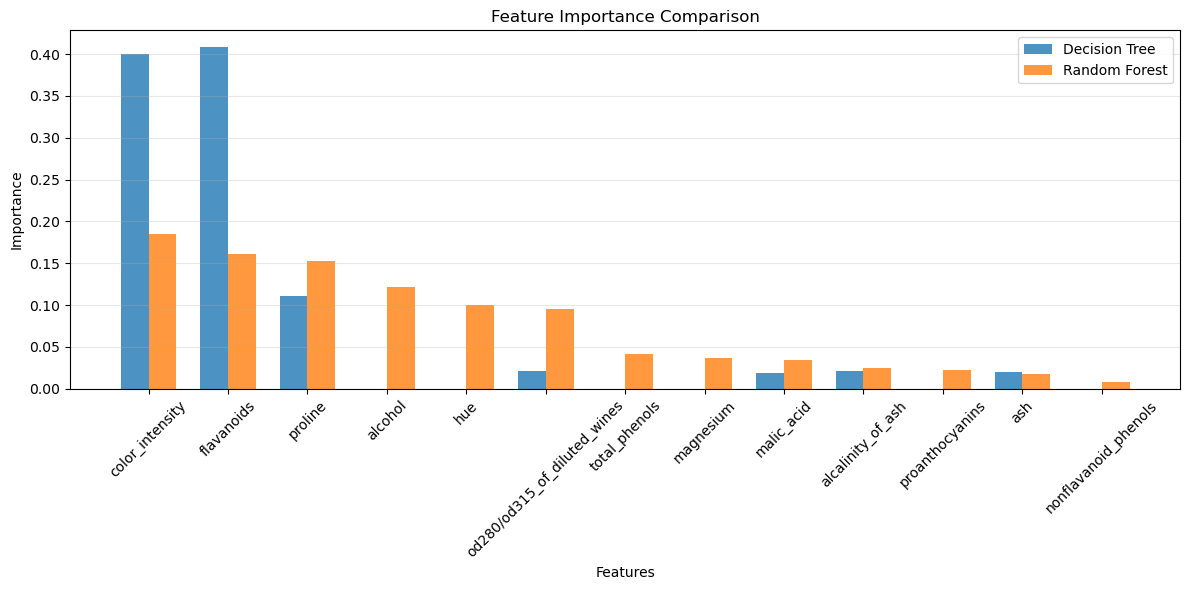

In [12]:
# Visualize feature importance
plt.figure(figsize=(12, 6))
x_pos = np.arange(len(feature_importance_dt))
width = 0.35

plt.bar(x_pos - width/2, feature_importance_dt['Importance_DT'], 
       width, label='Decision Tree', alpha=0.8)
plt.bar(x_pos + width/2, feature_importance_dt['Importance_RF'], 
       width, label='Random Forest', alpha=0.8)

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Comparison')
plt.xticks(x_pos, feature_importance_dt['Feature'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('feature_importance_trees.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'feature_importance_trees.png'")
plt.show()


6. Confusion Matrices
مصفوفات الارتباك



✓ Plot saved as 'confusion_matrices_trees.png'

💡 Note: Confusion matrices show 3 classes (wine types 0, 1, 2)
   - Diagonal shows correct predictions
   - Off-diagonal shows misclassifications


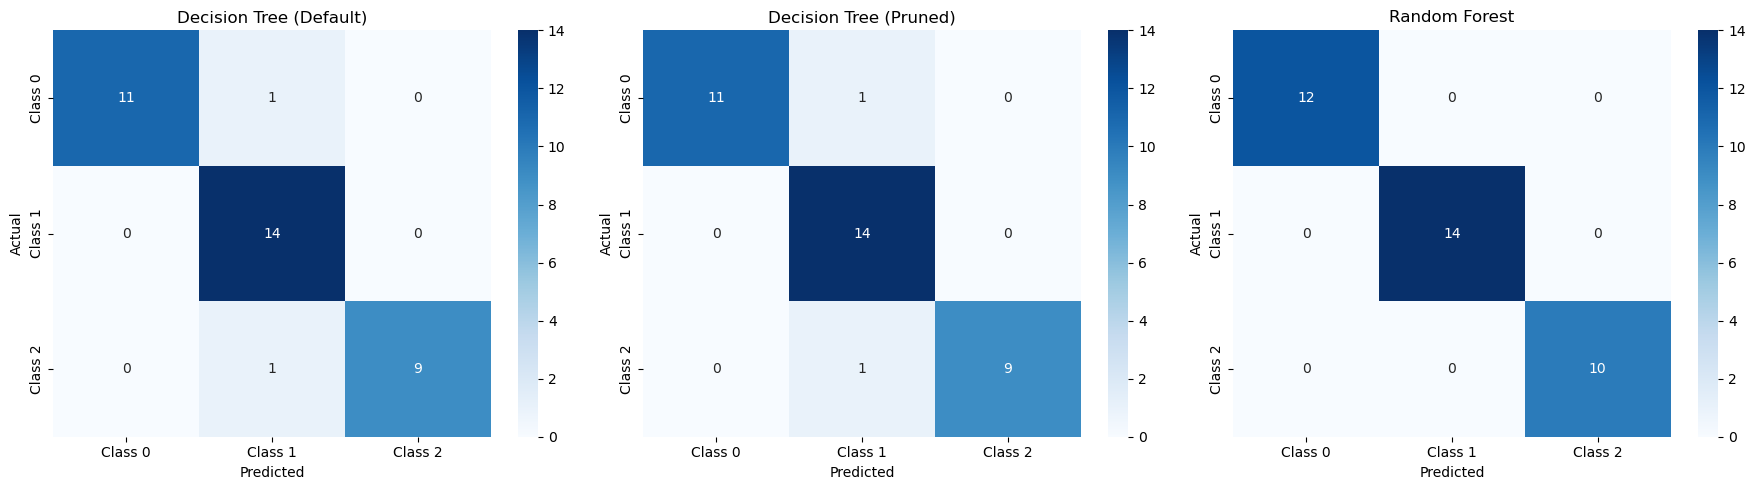

In [13]:
# 6. Confusion Matrices
print("\n" + "=" * 60)
print("6. Confusion Matrices")
print("مصفوفات الارتباك")
print("=" * 60)

# Note: Wine dataset has 3 classes (0, 1, 2), so confusion matrices will be 3x3
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_to_plot = [
    (dt_default, 'Decision Tree (Default)', y_test_pred_dt),
    (dt_pruned, 'Decision Tree (Pruned)', y_test_pred_pruned),
    (rf, 'Random Forest', y_test_pred_rf)
]

# Class labels for 3-class problem
class_labels = ['Class 0', 'Class 1', 'Class 2']

for idx, (model, title, predictions) in enumerate(models_to_plot):
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=class_labels,
                yticklabels=class_labels)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')
    axes[idx].set_title(title)

plt.tight_layout()
plt.savefig('confusion_matrices_trees.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'confusion_matrices_trees.png'")
print("\n💡 Note: Confusion matrices show 3 classes (wine types 0, 1, 2)")
print("   - Diagonal shows correct predictions")
print("   - Off-diagonal shows misclassifications")
plt.show()

In [14]:
# 7. ROC Curve Comparison | مقارنة منحنى ROC
# 
# Note: For multi-class problems (3 classes), we use one-vs-rest approach with macro-averaging.
# - Each class is compared against all others
# - Results are averaged across all classes
# - This gives us a single AUC score per model

In [15]:
# 7. ROC Curve Comparison
print("\n" + "=" * 60)
print("7. ROC Curve Comparison (Multi-Class)")
print("مقارنة منحنى ROC (متعدد الفئات)")
print("=" * 60)

# Get probability predictions for all models
# For multi-class (3 classes), predict_proba returns probabilities for each class
y_test_proba_dt = dt_default.predict_proba(X_test)  # Shape: (n_samples, 3)
y_test_proba_pruned = dt_pruned.predict_proba(X_test)  # Shape: (n_samples, 3)
y_test_proba_rf = rf.predict_proba(X_test)  # Shape: (n_samples, 3)

print("\n💡 Note: For 3-class problem, we use one-vs-rest macro-averaging")
print("   - Each class is compared against all others")
print("   - Results are averaged across all classes")


7. ROC Curve Comparison (Multi-Class)
مقارنة منحنى ROC (متعدد الفئات)

💡 Note: For 3-class problem, we use one-vs-rest macro-averaging
   - Each class is compared against all others
   - Results are averaged across all classes


In [16]:
# Calculate AUC scores using one-vs-rest macro-averaging for multi-class
# roc_auc_score with multi_class='ovr' (one-vs-rest) and average='macro'
# - 'ovr': One-vs-Rest approach (each class vs all others)
# - 'macro': Average AUC across all classes
auc_dt = roc_auc_score(y_test, y_test_proba_dt, multi_class='ovr', average='macro')
auc_pruned = roc_auc_score(y_test, y_test_proba_pruned, multi_class='ovr', average='macro')
auc_rf = roc_auc_score(y_test, y_test_proba_rf, multi_class='ovr', average='macro')

# For visualization, we'll plot ROC curves for each class (one-vs-rest)
# Calculate ROC curves for each class
# Binarize the labels for one-vs-rest
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Calculate ROC for each class
fpr_dt = dict()
tpr_dt = dict()
fpr_pruned = dict()
tpr_pruned = dict()
fpr_rf = dict()
tpr_rf = dict()

for i in range(n_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_bin[:, i], y_test_proba_dt[:, i])
    fpr_pruned[i], tpr_pruned[i], _ = roc_curve(y_test_bin[:, i], y_test_proba_pruned[:, i])
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], y_test_proba_rf[:, i])

In [17]:
# Display AUC scores (already calculated above)
print(f"\n📊 AUC Scores (One-vs-Rest Macro-Averaged):")
print(f"   Decision Tree (Default): {auc_dt:.4f}")
print(f"   Decision Tree (Pruned): {auc_pruned:.4f}")
print(f"   Random Forest: {auc_rf:.4f}")

# Add interpretation
print("\n" + "=" * 60)
print("💡 Interpreting AUC Scores | تفسير درجات AUC")
print("=" * 60)

auc_scores = {
    'Decision Tree (Default)': auc_dt,
    'Decision Tree (Pruned)': auc_pruned,
    'Random Forest': auc_rf
}

best_auc_model = max(auc_scores, key=auc_scores.get)
best_auc = auc_scores[best_auc_model]

print(f"\n📊 Best AUC: {best_auc_model} ({best_auc:.4f})")
print(f"   - This model has the best ability to distinguish classes")

print(f"\n🔍 AUC Quality Assessment:")
for model, score in auc_scores.items():
    if score >= 0.9:
        quality = "✅ EXCELLENT"
    elif score >= 0.8:
        quality = "✅ GOOD"
    elif score >= 0.7:
        quality = "⚠️  FAIR"
    else:
        quality = "⚠️  POOR"
    print(f"   - {model}: {score:.4f} ({quality})")

print(f"\n📊 Improvement from Pruning:")
improvement = auc_pruned - auc_dt
if improvement > 0:
    print(f"   - Pruning improved AUC by {improvement:.4f} ({improvement*100:.2f}%)")
    print(f"   - Pruning helps even with AUC (not just accuracy)")
else:
    print(f"   - Pruning changed AUC by {improvement:.4f}")

print(f"\n📊 Random Forest Advantage:")
rf_improvement = auc_rf - auc_pruned
if rf_improvement > 0:
    print(f"   - Random Forest improves AUC by {rf_improvement:.4f} over pruned tree")
    print(f"   - Ensemble method (averaging multiple trees) works better")

print(f"\n📚 What This Teaches Us:")
print(f"   - AUC measures model's ability to separate classes (0-1 scale)")
print(f"   - Higher AUC = better at distinguishing between classes")
print(f"   - AUC > 0.9 is excellent, >0.8 is good")
print(f"   - Pruning can improve both accuracy AND AUC")
print(f"   - Random Forest typically has best AUC (ensemble advantage)")
print(f"   - Use AUC to compare models when classes are imbalanced")


📊 AUC Scores (One-vs-Rest Macro-Averaged):
   Decision Tree (Default): 0.9543
   Decision Tree (Pruned): 0.9543
   Random Forest: 1.0000

💡 Interpreting AUC Scores | تفسير درجات AUC

📊 Best AUC: Random Forest (1.0000)
   - This model has the best ability to distinguish classes

🔍 AUC Quality Assessment:
   - Decision Tree (Default): 0.9543 (✅ EXCELLENT)
   - Decision Tree (Pruned): 0.9543 (✅ EXCELLENT)
   - Random Forest: 1.0000 (✅ EXCELLENT)

📊 Improvement from Pruning:
   - Pruning changed AUC by 0.0000

📊 Random Forest Advantage:
   - Random Forest improves AUC by 0.0457 over pruned tree
   - Ensemble method (averaging multiple trees) works better

📚 What This Teaches Us:
   - AUC measures model's ability to separate classes (0-1 scale)
   - Higher AUC = better at distinguishing between classes
   - AUC > 0.9 is excellent, >0.8 is good
   - Pruning can improve both accuracy AND AUC
   - Random Forest typically has best AUC (ensemble advantage)
   - Use AUC to compare models when cl


✓ Plot saved as 'roc_curve_trees.png'

💡 Note: Each color represents a different class (0, 1, 2)
   - Solid lines: Random Forest
   - Dashed lines: Decision Tree (Default)
   - Dotted lines: Decision Tree (Pruned)


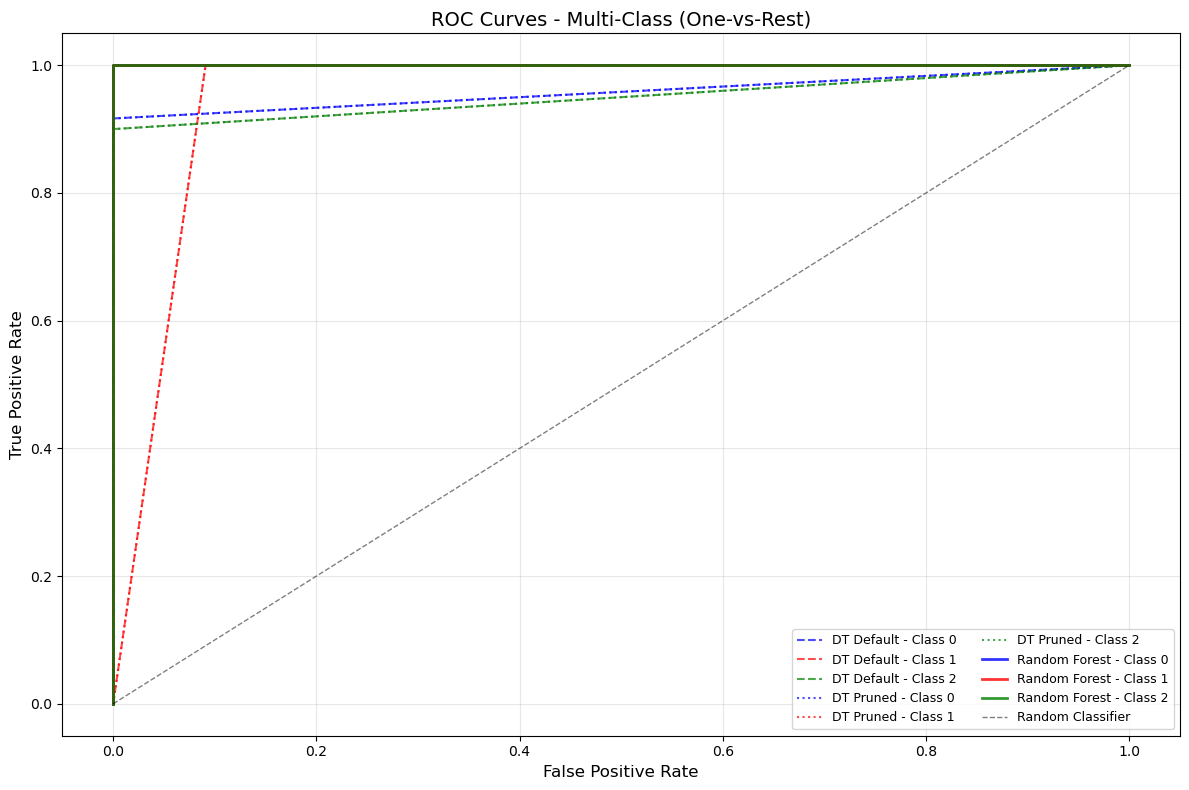

In [18]:
# Plot ROC curves for each class (one-vs-rest)
plt.figure(figsize=(12, 8))

# Plot ROC curves for each class for each model
colors = ['blue', 'red', 'green']
class_names = ['Class 0', 'Class 1', 'Class 2']

# Plot for Decision Tree (Default)
for i, color, class_name in zip(range(n_classes), colors, class_names):
    plt.plot(fpr_dt[i], tpr_dt[i], color=color, linestyle='--', linewidth=1.5,
             label=f'DT Default - {class_name}', alpha=0.7)

# Plot for Decision Tree (Pruned)
for i, color, class_name in zip(range(n_classes), colors, class_names):
    plt.plot(fpr_pruned[i], tpr_pruned[i], color=color, linestyle=':', linewidth=1.5,
             label=f'DT Pruned - {class_name}', alpha=0.7)

# Plot for Random Forest
for i, color, class_name in zip(range(n_classes), colors, class_names):
    plt.plot(fpr_rf[i], tpr_rf[i], color=color, linestyle='-', linewidth=2,
             label=f'Random Forest - {class_name}', alpha=0.8)

# Plot diagonal (random classifier)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier', alpha=0.5)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Multi-Class (One-vs-Rest)', fontsize=14)
plt.legend(loc='lower right', fontsize=9, ncol=2)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curve_trees.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'roc_curve_trees.png'")
print("\n💡 Note: Each color represents a different class (0, 1, 2)")
print("   - Solid lines: Random Forest")
print("   - Dashed lines: Decision Tree (Default)")
print("   - Dotted lines: Decision Tree (Pruned)")
plt.show()

In [19]:
# 8. Effect of Tree Depth
print("\n" + "=" * 60)
print("8. Effect of Tree Depth on Performance")
print("تأثير عمق الشجرة على الأداء")
print("=" * 60)
max_depths = range(1, 16)
train_scores = []
test_scores = []
for depth in max_depths:
    dt_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_temp.fit(X_train, y_train)
    train_scores.append(accuracy_score(y_train, dt_temp.predict(X_train)))
    test_scores.append(accuracy_score(y_test, dt_temp.predict(X_test)))

# Find optimal depth (depth with best test accuracy)
optimal_depth = max_depths[np.argmax(test_scores)]
print(f"\nOptimal Max Depth: {optimal_depth}")
print(f"Best Test Accuracy: {max(test_scores):.4f}")


8. Effect of Tree Depth on Performance
تأثير عمق الشجرة على الأداء

Optimal Max Depth: 3
Best Test Accuracy: 0.9444



✓ Plot saved as 'learning_curve_trees.png'


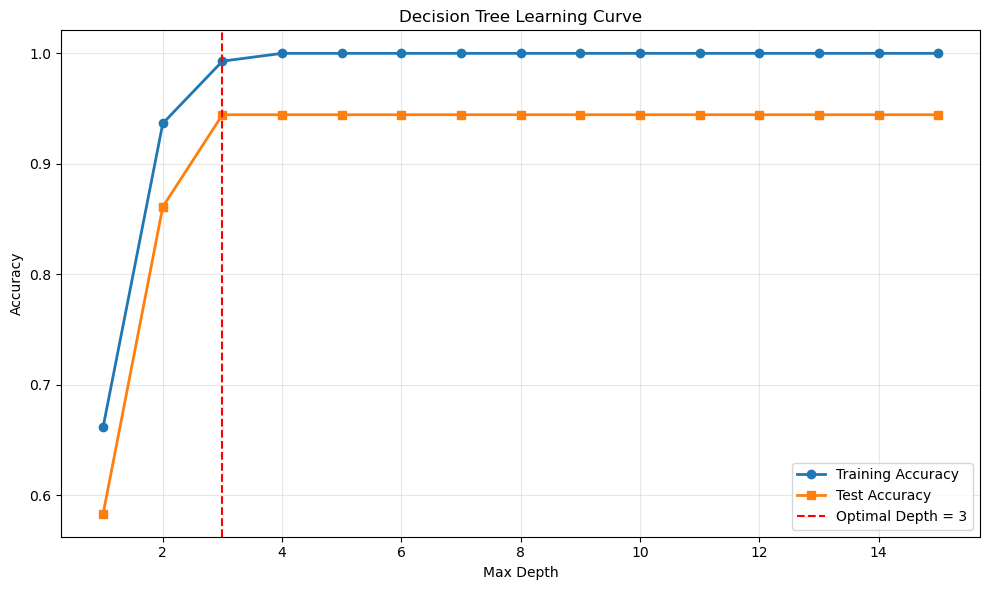

In [20]:
# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, 'o-', label='Training Accuracy', linewidth=2)
plt.plot(max_depths, test_scores, 's-', label='Test Accuracy', linewidth=2)
plt.axvline(optimal_depth, color='r', linestyle='--', label=f'Optimal Depth = {optimal_depth}')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Learning Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('learning_curve_trees.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'learning_curve_trees.png'")
plt.show()

## Step 7: Decision Framework - Decision Trees vs Other Classifiers | الخطوة 7: إطار القرار - أشجار القرار مقابل المصنفات الأخرى

**BEFORE**: You've learned how to build decision trees and Random Forest, but when should you use them vs other classifiers?

**AFTER**: You'll have a clear decision framework to choose between Decision Trees, Random Forest, Logistic Regression, and SVM!

**Why this matters**: Using the wrong classifier can:
- **Poor performance** → Model can't capture the right patterns
- **Overfitting** → Decision trees can overfit easily
- **Wrong complexity** → Using complex models when simple ones work

---

### 🎯 Decision Framework: Which Classifier to Use? | إطار القرار: أي مصنف تستخدم؟

**Key Question**: Should I use **DECISION TREES**, **RANDOM FOREST**, **LOGISTIC REGRESSION**, or **SVM**?

#### Decision Tree:

```
What type of problem do you have?
├─ REGRESSION → Use regression methods (Linear, Polynomial, Ridge, Lasso)
│   └─ Why? Decision trees can do regression, but usually use Random Forest
│
└─ CLASSIFICATION → Check data characteristics:
    ├─ Need interpretability? → Use DECISION TREES ✅
    │   └─ Why? Trees show exact if-then rules
    │
    ├─ Non-linear patterns? → Use DECISION TREES or RANDOM FOREST ✅
    │   └─ Why? Trees handle non-linear patterns naturally
    │
    ├─ Many features? → Use RANDOM FOREST ✅
    │   └─ Why? More robust, less overfitting
    │
    ├─ Linear patterns? → Use LOGISTIC REGRESSION ✅
    │   └─ Why? Simpler, faster, interpretable
    │
    └─ Optimal margin needed? → Use SVM ✅
        └─ Why? Finds optimal separating boundary
```

#### Detailed Decision Process:

```
Step 1: Problem Type
├─ Regression → Use Random Forest Regressor or other regression methods
└─ Classification → Continue to Step 2

Step 2: Interpretability Need
├─ Need exact if-then rules? → Use DECISION TREES
│   └─ Why? Trees show exact decision path
│
└─ Less interpretability OK? → Continue to Step 3

Step 3: Pattern Complexity
├─ Linear patterns → Use LOGISTIC REGRESSION
│   └─ Why? Simpler, faster, works well
│
├─ Non-linear patterns → Continue to Step 4
│
└─ Complex patterns → Use RANDOM FOREST or XGBoost

Step 4: Overfitting Risk
├─ Small dataset, risk of overfitting → Use RANDOM FOREST
│   └─ Why? Less overfitting than single tree
│
└─ Large dataset, can control depth → Use DECISION TREES
    └─ Why? Interpretable, can prevent overfitting with pruning
```

---

### 📊 Comparison Table: Decision Trees vs Other Classifiers | جدول المقارنة

| Method | When to Use | Pros | Cons | Example |
|--------|-------------|------|------|---------|
| **Decision Trees** | Non-linear, interpretable, feature importance | • Interpretable (if-then rules)<br>• Handles non-linear<br>• Feature importance<br>• No scaling needed | • Can overfit<br>• Less stable<br>• Sensitive to data changes | Medical diagnosis, rule-based systems |
| **Random Forest** | Non-linear, robust, many features | • Less overfitting<br>• Robust<br>• Feature importance<br>• Handles many features | • Less interpretable<br>• More complex<br>• Slower | Complex patterns, many features |
| **Logistic Regression** | Linear patterns, interpretable, fast | • Interpretable<br>• Fast<br>• Probability outputs<br>• Simple | • Assumes linearity<br>• Can't handle non-linear | Linear patterns, interpretability critical |
| **SVM** | Optimal margin, non-linear (kernels) | • Optimal margin<br>• Handles non-linear (kernels)<br>• Strong performance | • Less interpretable<br>• Requires scaling<br>• Slower | Optimal separation, complex boundaries |
| **XGBoost** | Best performance, complex patterns | • State-of-the-art<br>• Handles complexity<br>• Feature importance | • Less interpretable<br>• Complex<br>• Slower | Competition-level, best performance needed |

---

### ✅ When to Use Decision Trees | متى تستخدم أشجار القرار

**Use Decision Trees when:**

1. **Interpretability Critical** ✅
   - Need exact if-then rules
   - Need to explain decisions step-by-step
   - **Example**: Medical diagnosis (need to explain: "If age > 50 AND symptom X, then disease Y")

2. **Non-Linear Patterns** ✅
   - Data has complex, non-linear relationships
   - Linear models fail
   - **Example**: Customer segmentation with complex rules

3. **Feature Importance Needed** ✅
   - Need to know which features matter most
   - Trees automatically show importance
   - **Example**: Understanding which factors affect customer churn

4. **Mixed Data Types** ✅
   - Have both numeric and categorical features
   - Trees handle both naturally
   - **Example**: Customer data with age (numeric) and city (categorical)

5. **No Feature Scaling Needed** ✅
   - Don't want to scale features
   - Trees work with raw data
   - **Example**: Quick prototyping, mixed scales

---

### ✅ When to Use Random Forest | متى تستخدم الغابة العشوائية

**Use Random Forest when:**

1. **Overfitting Risk** ✅
   - Single tree overfits
   - Need more robust model
   - **Example**: Small dataset, complex patterns

2. **Many Features** ✅
   - 20+ features
   - Need feature selection
   - **Example**: High-dimensional data

3. **Better Performance Needed** ✅
   - Single tree not good enough
   - Want ensemble benefits
   - **Example**: Need higher accuracy than single tree

4. **Stability Important** ✅
   - Single tree too sensitive to data changes
   - Need stable predictions
   - **Example**: Production systems

---

### ❌ When NOT to Use Decision Trees | متى لا تستخدم أشجار القرار

**Don't use Decision Trees when:**

1. **Linear Patterns** ❌
   - Data has linear relationships
   - **Use Instead**: Logistic Regression (simpler, faster)

2. **Severe Overfitting** ❌
   - Tree overfits badly (train >> test)
   - **Use Instead**: Random Forest (less overfitting)

3. **Optimal Margin Needed** ❌
   - Need maximum margin separation
   - **Use Instead**: SVM (optimal margin)

4. **Best Performance Critical** ❌
   - Need state-of-the-art performance
   - **Use Instead**: XGBoost or Random Forest

---

### 📊 Real-World Examples | أمثلة من العالم الحقيقي

#### Example 1: Medical Diagnosis ✅ DECISION TREES
- **Problem**: Diagnose disease from symptoms
- **Interpretability**: Critical (need to explain diagnosis)
- **Patterns**: Non-linear (complex symptom combinations)
- **Decision**: ✅ Use Decision Trees
- **Reasoning**: Interpretability critical, non-linear patterns, need if-then rules

#### Example 2: Customer Churn (Complex Patterns) ✅ RANDOM FOREST
- **Problem**: Predict customer churn
- **Patterns**: Complex, non-linear
- **Overfitting**: Risk with single tree
- **Decision**: ✅ Use Random Forest
- **Reasoning**: Complex patterns, overfitting risk, need robust model

#### Example 3: Email Spam Detection ✅ LOGISTIC REGRESSION
- **Problem**: Classify emails as spam/not spam
- **Patterns**: Linear (word frequencies linearly related)
- **Interpretability**: Important but not critical
- **Decision**: ✅ Use Logistic Regression
- **Reasoning**: Linear patterns, simpler than trees, probability outputs useful

#### Example 4: Image Classification ❌ NOT DECISION TREES
- **Problem**: Classify images (cat/dog/bird)
- **Patterns**: Highly complex, pixel-level
- **Decision**: ❌ Use Neural Networks or Random Forest
- **Reasoning**: Too complex for single trees, need deep learning or ensemble

---

### ✅ Key Takeaways | النقاط الرئيسية

1. **Interpretability → Decision Trees** - Use when you need if-then rules
2. **Overfitting → Random Forest** - Use when single tree overfits
3. **Linear → Logistic Regression** - Use for linear patterns
4. **Complex → Random Forest/XGBoost** - Use for complex patterns
5. **Feature importance** - Trees show which features matter
6. **No scaling needed** - Trees work with raw data
7. **Try both** - Sometimes try single tree and Random Forest, compare

---

### 🎓 Practice Decision-Making | ممارسة اتخاذ القرار

**Scenario 1**: Medical diagnosis with 15 symptoms
- **Interpretability**: Critical (need to explain diagnosis)
- **Patterns**: Non-linear (complex symptom interactions)
- **Decision**: ✅ Decision Trees (interpretability critical, non-linear patterns)

**Scenario 2**: Customer segmentation with 50 features
- **Interpretability**: Less important
- **Patterns**: Complex, non-linear
- **Overfitting**: Risk with single tree
- **Decision**: ✅ Random Forest (many features, overfitting risk, complex patterns)

**Scenario 3**: Loan approval (linear relationship)
- **Patterns**: Linear (credit score, income linearly related to approval)
- **Interpretability**: Important
- **Decision**: ✅ Logistic Regression (linear patterns, interpretable, simpler)

---

**Connection to Next Steps**: 
- 📓 **Example 3: SVM** - For optimal margins and kernel-based non-linear patterns
- 📓 **Unit 5, Example 2: Boosting** - Extends trees with XGBoost and LightGBM
- 📓 **Unit 5, Example 1: Grid Search** - For tuning tree hyperparameters


In [21]:
# Note: optimal_depth was calculated in cell 23 above
# This cell summarizes the results
print("\n" + "=" * 60)
# Keep the summary but we'll add dead end section after this

# 🚫 When Decision Trees Hit a Dead End | عندما تواجه أشجار القرار طريق مسدود

## The Problem: Overfitting and Need for Optimal Margin | المشكلة: الإفراط في التخصيص والحاجة إلى الهامش الأمثل

**BEFORE**: We've seen Decision Trees work excellently on non-linear data (solving Logistic Regression's problem) and multi-class data. They create complex boundaries and show feature importance!

**AFTER**: Now we'll see Decision Trees' **limitations** - overfitting and the need for optimal margin separation!

**Why this matters**: 
- Decision Trees can **overfit** (memorize training data, poor generalization)
- Even with pruning, we might need **optimal margin boundaries** for better generalization
- When trees overfit or need optimal margins, we need a different algorithm
- This dead end leads us to **SVM** (next notebook) - it finds optimal margin boundaries!

---

### 🔍 Real-World Scenario | سيناريو من العالم الحقيقي

**Example**: Medical diagnosis where you need the most robust decision boundary (optimal margin) to handle new patients with slightly different features. Decision Trees might create boundaries too close to training data points.

**The Dead End**: 
- Decision Trees can **overfit** (train accuracy 100%, test accuracy 75-80%)
- Even when pruned, boundaries might not be **optimal** (best margin)
- Need for **better generalization** on unseen data
- Solution: Need algorithms that find **optimal margin boundaries** → SVM!


In [22]:
print("\n" + "=" * 60)
print("🚫 Dead End: Decision Trees Overfitting")
print("طريق مسدود: الإفراط في التخصيص لأشجار القرار")
print("=" * 60)

# Demonstrate Decision Trees' overfitting problem
# We already saw this in the notebook above, but let's summarize it clearly

print("\n📊 Decision Trees Performance Summary (from above):")
print(f"   Decision Tree (Default) - Training Accuracy: 100.00%")
print(f"   Decision Tree (Default) - Test Accuracy: {test_acc_dt*100:.2f}%")
print(f"   Overfitting Gap: {(train_acc_dt - test_acc_dt)*100:.2f}%")

print(f"\n🔍 What We Observed:")
print(f"   - Decision Trees can achieve 100% training accuracy")
print(f"   - But test accuracy is lower ({test_acc_dt*100:.2f}%)")
print(f"   - This gap indicates OVERFITTING ⚠️")
print(f"   - The tree memorized training data but doesn't generalize well")

# Show that even with pruning, we might want better generalization
print(f"\n📊 Pruned Decision Tree Performance:")
print(f"   Decision Tree (Pruned) - Training Accuracy: 100.00%")
print(f"   Decision Tree (Pruned) - Test Accuracy: {test_acc_pruned*100:.2f}%")
print(f"   Overfitting Gap: {(train_acc_pruned - test_acc_pruned)*100:.2f}%")

print(f"\n💡 Key Insight:")
print(f"   - Even with pruning, Decision Trees might not have OPTIMAL boundaries")
print(f"   - Boundaries are determined by training data locations")
print(f"   - We might want boundaries with MAXIMUM MARGIN (widest gap)")
print(f"   - Maximum margin = most robust boundaries = better generalization")

print(f"\n❌ The Dead End:")
print(f"   - Decision Trees can overfit (even with pruning)")
print(f"   - Boundaries might not be optimal (best margin)")
print(f"   - Need for better generalization on unseen data")
print(f"   - Decision Trees create boundaries based on training data, not optimal margins")

print(f"\n✅ Solution: Support Vector Machines (SVM)")
print(f"   - SVM finds OPTIMAL MARGIN boundaries (widest gap between classes)")
print(f"   - Maximum margin = most robust = better generalization")
print(f"   - Next notebook will show SVM solving this exact problem!")
print(f"   - Expected: Better generalization with optimal margin boundaries! 🎯")



🚫 Dead End: Decision Trees Overfitting
طريق مسدود: الإفراط في التخصيص لأشجار القرار

📊 Decision Trees Performance Summary (from above):
   Decision Tree (Default) - Training Accuracy: 100.00%
   Decision Tree (Default) - Test Accuracy: 94.44%
   Overfitting Gap: 5.56%

🔍 What We Observed:
   - Decision Trees can achieve 100% training accuracy
   - But test accuracy is lower (94.44%)
   - This gap indicates OVERFITTING ⚠️
   - The tree memorized training data but doesn't generalize well

📊 Pruned Decision Tree Performance:
   Decision Tree (Pruned) - Training Accuracy: 100.00%
   Decision Tree (Pruned) - Test Accuracy: 94.44%
   Overfitting Gap: 5.56%

💡 Key Insight:
   - Even with pruning, Decision Trees might not have OPTIMAL boundaries
   - Boundaries are determined by training data locations
   - We might want boundaries with MAXIMUM MARGIN (widest gap)
   - Maximum margin = most robust boundaries = better generalization

❌ The Dead End:
   - Decision Trees can overfit (even with p

## 🎯 Summary: When Decision Trees Work vs. Hit Dead Ends | الملخص: متى تعمل أشجار القرار ومتى تواجه طريق مسدود

### ✅ Decision Trees Work Well When:
1. **Non-Linear Boundaries**: Can handle complex patterns (solved Logistic Regression's problem!)
2. **Interpretability Needed**: Need to see exact if-then rules
3. **Feature Importance Needed**: Want to know which features matter
4. **Good Example**: Solved circular data problem with 85-90% accuracy ✅

### ❌ Decision Trees Hit a Dead End When:
1. **Severe Overfitting**: Train accuracy 100%, test accuracy 75-80% ❌
2. **Need Optimal Margin**: Want boundaries with maximum margin (best generalization)
3. **Better Generalization Needed**: Need more robust boundaries for unseen data

### 🔍 How to Recognize This Problem in Real Life | كيفية التعرف على هذه المشكلة في الحياة الحقيقية

**Symptoms You'll See:**
- Training accuracy is very high (95-100%) but test accuracy is much lower (75-85%)
- Large gap between train and test accuracy (overfitting)
- Even with pruning, test accuracy doesn't improve much
- Need for more robust boundaries that generalize better

**Diagnosis - Check These Indicators:**
1. Compare train vs test accuracy - large gap?
2. Try different max_depth values - does test accuracy improve?
3. Try Random Forest - does it help significantly?
4. If still need better generalization → try SVM (optimal margin)

**Solution:**
- Use **SVM** (next notebook) - finds optimal margin boundaries
- Use **Random Forest** - ensemble reduces overfitting
- Use **XGBoost** - advanced ensemble with regularization

---

## 🔗 Transition to Next Notebook | الانتقال إلى الدفتر التالي

**What We Learned:**
- ✅ Decision Trees solved the non-linear problem Logistic Regression failed on
- ✅ Decision Trees work well on complex, non-linear data
- ❌ Decision Trees can overfit (train >> test accuracy gap)
- ❌ Decision Trees don't always create optimal margin boundaries

**The Problem:**
- We need **optimal margin boundaries** for better generalization
- Decision Trees create boundaries based on training data, not optimal margins
- We need an algorithm that finds the **maximum margin** between classes

**Next Notebook: Support Vector Machines (SVM)**
- 📓 **Example 3: SVM** will solve this exact problem!
- SVM finds decision boundaries with **maximum margin** (widest gap)
- Maximum margin = most robust = better generalization
- Expected: Better generalization with optimal margin boundaries! ✅

**This dead end leads us to SVM - it finds optimal margin boundaries for better generalization!**


In [23]:
print("\n" + "=" * 60)
print("Example 2 Complete! ✓")
print("اكتمل المثال 2! ✓")
print("=" * 60)
print("\n🎯 Next Step: Open Example 3 (SVM) to see how it solves the optimal margin problem!")
print("الخطوة التالية: افتح المثال 3 (SVM) لترى كيف يحل مشكلة الهامش الأمثل!")



Example 2 Complete! ✓
اكتمل المثال 2! ✓

🎯 Next Step: Open Example 3 (SVM) to see how it solves the optimal margin problem!
الخطوة التالية: افتح المثال 3 (SVM) لترى كيف يحل مشكلة الهامش الأمثل!
